<h1>Flight Price Dataset of Bangladesh</h1>
<p>This dataset was inspired by real-world flight data from Bangladesh</p>
<h2>About Dataset</h2>
<h3>Introduction</h3>
<p>The "Bangladesh Flight Fare Dataset" is a synthetic dataset comprising 57,000 flight records tailored to represent air travel scenarios originating from Bangladesh. This dataset simulates realistic flight fare dynamics, capturing key factors such as airline operations, airport specifics, travel classes, booking behaviors, and seasonal variations specific to Bangladesh’s aviation market. It is designed for researchers, data scientists, and analysts interested in flight fare prediction, travel pattern analysis, or machine learning/deep learning applications. By combining real-world inspired statistical distributions and aviation industry standards, this dataset provides a robust foundation for exploring flight economics in a South Asian context.</p>
<h3>Dataset Purpose</h3>
<p>This dataset aims to:</p>
<ul>
<li>Facilitate predictive modeling of flight fares, with "Total Fare (BDT)" as the primary target variable.</li>
<li>Enable analysis of travel trends, including the impact of cultural festivals (e.g., Eid, Hajj) and booking timings on pricing.</li>
<li>Serve as a training resource for machine learning (ML) and deep learning (DL) models, with sufficient sample size (50,000) and feature diversity for generalization.</li>
<li>Provide a realistic yet synthetic representation of Bangladesh’s air travel ecosystem, blending domestic and international flight scenarios.</li>
</ul>
<h2>Data Source</h2>
<h3>Kaggle</h3>
<p><a href="https://www.kaggle.com/datasets/mahatiratusher/flight-price-dataset-of-bangladesh">Flight Price Dataset of Bangladesh</a></p>

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./datasets/Flight_Price_Dataset_of_Bangladesh.csv")
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [21]:
df.shape

(57000, 17)

# 1. Preprocessing Data

## 1. Features Selection

In [22]:
df.head()

,Airline,Source,Source Name,Destination,Destination Name,Departure Date & Time,Arrival Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,Cox's Bazar Airport,CCU,Netaji Subhas Chandra Bose International Airpo...,2025-11-17 06:25:00,2025-11-17 07:38:10,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,Barisal Airport,CGP,"Shah Amanat International Airport, Chittagong",2025-03-16 00:17:00,2025-03-16 00:53:31,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,"Osmani International Airport, Sylhet",KUL,Kuala Lumpur International Airport,2025-12-13 12:03:00,2025-12-13 14:44:22,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,"Shah Makhdum Airport, Rajshahi",DAC,"Hazrat Shahjalal International Airport, Dhaka",2025-05-30 03:21:00,2025-05-30 04:02:09,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,Saidpur Airport,YYZ,Toronto Pearson International Airport,2025-04-25 09:14:00,2025-04-25 23:17:20,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [23]:
df.drop(['Source Name','Destination Name','Arrival Date & Time'], axis=1, inplace=True)
df.head()

,Airline,Source,Destination,Departure Date & Time,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,CCU,2025-11-17 06:25:00,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,CGP,2025-03-16 00:17:00,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,KUL,2025-12-13 12:03:00,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,DAC,2025-05-30 03:21:00,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,YYZ,2025-04-25 09:14:00,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [24]:
df.shape

(57000, 14)

## 2. Missing Data

In [10]:
df.isnull().sum()

Airline                  0
Source                   0
Destination              0
Departure Date & Time    0
Duration (hrs)           0
Stopovers                0
Aircraft Type            0
Class                    0
Booking Source           0
Base Fare (BDT)          0
Tax & Surcharge (BDT)    0
Total Fare (BDT)         0
Seasonality              0
Days Before Departure    0
dtype: int64

## 3. Duplicates

In [11]:
df.duplicated().sum()

np.int64(0)

## 4. Data Type

In [25]:
df.dtypes

Airline                   object
Source                    object
Destination               object
Departure Date & Time     object
Duration (hrs)           float64
Stopovers                 object
Aircraft Type             object
Class                     object
Booking Source            object
Base Fare (BDT)          float64
Tax & Surcharge (BDT)    float64
Total Fare (BDT)         float64
Seasonality               object
Days Before Departure      int64
dtype: object

In [26]:
df['Departure Date & Time'] = pd.to_datetime(df['Departure Date & Time'])
df.dtypes

Airline                          object
Source                           object
Destination                      object
Departure Date & Time    datetime64[ns]
Duration (hrs)                  float64
Stopovers                        object
Aircraft Type                    object
Class                            object
Booking Source                   object
Base Fare (BDT)                 float64
Tax & Surcharge (BDT)           float64
Total Fare (BDT)                float64
Seasonality                      object
Days Before Departure             int64
dtype: object

In [27]:
df['Departure Date & Time'] = df['Departure Date & Time'].dt.date
df = df.rename(columns={'Departure Date & Time':'Date'})
df.head()

,Airline,Source,Destination,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure
0,Malaysian Airlines,CXB,CCU,2025-11-17,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10
1,Cathay Pacific,BZL,CGP,2025-03-16,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14
2,British Airways,ZYL,KUL,2025-12-13,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83
3,Singapore Airlines,RJH,DAC,2025-05-30,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56
4,British Airways,SPD,YYZ,2025-04-25,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90


In [29]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 2. Exploratory Data Analysis

## 1. Feature Engineering

Create new features that will be used in the next EDA

In [ ]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
# Ekstrak tahun dan bulan dari kolom 'Date'
df['YearMonth'] = df['Date'].dt.to_period('M')
# Aggregasi per bulan dengan menghitung rata-rata Fare
df_monthly = df.groupby('YearMonth')['Total Fare (BDT)'].mean().reset_index()
# Ubah 'YearMonth' kembali ke datetime
df_monthly['YearMonth'] = df_monthly['YearMonth'].dt.to_timestamp()

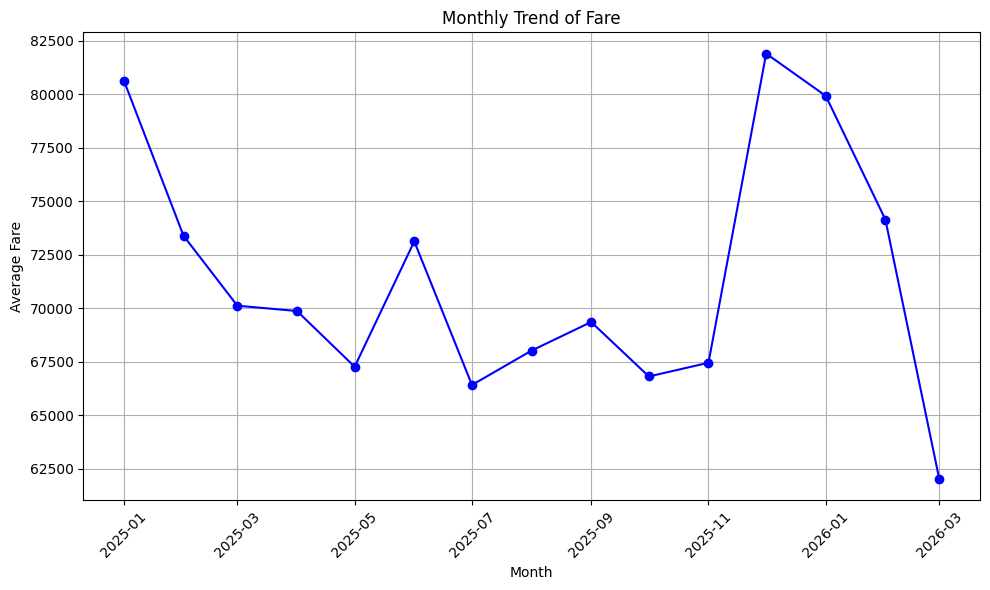

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df_monthly['YearMonth'], df_monthly['Total Fare (BDT)'], marker='o', linestyle='-', color='b')
plt.title('Monthly Trend of Fare')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
df['Route'] = df['Source'] + ' - ' + df['Destination']
df.drop(['Source','Destination'], axis=1, inplace=True)
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route
0,Malaysian Airlines,2025-11-17,1.219526,Direct,Airbus A320,Economy,Online Website,21131.225021,5169.683753,26300.908775,Regular,10,2025-11,CXB - CCU
1,Cathay Pacific,2025-03-16,0.608638,Direct,Airbus A320,First Class,Travel Agency,11605.395471,200.000000,11805.395471,Regular,14,2025-03,BZL - CGP
2,British Airways,2025-12-13,2.689651,1 Stop,Boeing 787,Economy,Travel Agency,39882.499349,11982.374902,51864.874251,Winter Holidays,83,2025-12,ZYL - KUL
3,Singapore Airlines,2025-05-30,0.686054,Direct,Airbus A320,Economy,Direct Booking,4435.607340,200.000000,4635.607340,Regular,56,2025-05,RJH - DAC
4,British Airways,2025-04-25,14.055609,1 Stop,Airbus A350,Business,Direct Booking,59243.806146,14886.570922,74130.377068,Regular,90,2025-04,SPD - YYZ


In [5]:
df = df.sort_values(by=['Airline', 'Route', 'Date'])
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK


In [6]:
df['Changes'] = df.groupby(['Airline', 'Route'])['Total Fare (BDT)'].diff()
df['Changes'] = df['Changes'].fillna(0)
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,84352.781917
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-100498.123930
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,7365.004899
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,-2952.100155


In [7]:
# Calculate percentiles
percentile_10 = df['Changes'].quantile(0.10)
percentile_25 = df['Changes'].quantile(0.25)
percentile_50 = df['Changes'].quantile(0.50)
percentile_75 = df['Changes'].quantile(0.75)
percentile_90 = df['Changes'].quantile(0.90)

In [8]:
# Function to categorize trend intensity
def categorize_trend_intensity(change):
    if change > percentile_90:
        return 'Steep Increase'
    elif change > percentile_75:
        return 'Moderate Increase'
    elif change > percentile_50:
        return 'Gradual Increase'
    elif change < percentile_10:
        return 'Steep Decrease'
    elif change < percentile_25:
        return 'Moderate Decrease'
    elif change < percentile_50:
        return 'Gradual Decrease'
    else:
        return 'Stable'

In [9]:
df['Trend'] = df['Changes'].apply(categorize_trend_intensity)
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes,Trend
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000,Stable
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,84352.781917,Moderate Increase
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-100498.123930,Moderate Decrease
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,7365.004899,Gradual Increase
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,-2952.100155,Gradual Decrease


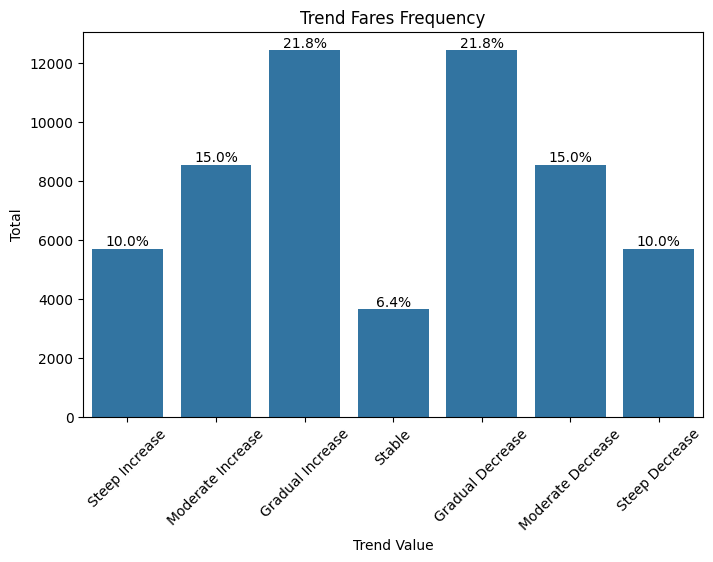

In [10]:
# Sorting
trend_sort = ['Steep Increase', 'Moderate Increase', 'Gradual Increase', 'Stable','Gradual Decrease','Moderate Decrease','Steep Decrease']

# Calculate The Trend
trend_counts = df['Trend'].value_counts().reindex(trend_sort, fill_value=0)
total = len(df)
percentages = (trend_counts / total) * 100

# bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x=trend_counts.index, y=trend_counts.values, order=trend_sort)
for i, value in enumerate(trend_counts.values):
    percentage = f'{percentages[i]:.1f}%'
    plt.text(i, value + 0.1, percentage, ha='center', va='bottom')
plt.xticks(rotation=45)
plt.title('Trend Fares Frequency')
plt.xlabel('Trend Value')
plt.ylabel('Total')
plt.show()

In [3]:
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes,Trend
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000,Gradual Increase
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,49842.239229,Moderate Increase
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-63881.667066,Moderate Decrease
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,-3606.100348,Gradual Increase
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,7443.408821,Gradual Increase


In [16]:
df['Duration (hrs)'].describe()

count    57000.000000
mean         3.994955
std          4.094043
min          0.500000
25%          1.003745
50%          2.644656
75%          5.490104
max         15.831719
Name: Duration (hrs), dtype: float64

In [12]:
# Define intervals and labels
bins = [0, 1, 3, 6, 10, 16]
labels = ['0–1 hour', '1–3 hours', '3–6 hours', '6–10 hours', '10–16 hours']

# Create categories based on intervals
df['Duration Category'] = pd.cut(df['Duration (hrs)'], bins=bins, labels=labels)

In [13]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_eda(2).pkl', 'wb') as file:
    pickle.dump(df, file)

## 2. Seasonality

Are there different price patterns between regular and holiday seasons?

In [9]:
# Loading DataFrame from pickle file
with open('./datasets/data_eda(2).pkl', 'rb') as file:
    df = pickle.load(file)

In [45]:
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes,Trend,Duration Category
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000,Gradual Increase,1–3 hours
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,84352.781917,Moderate Increase,1–3 hours
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-100498.123930,Moderate Decrease,1–3 hours
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,7365.004899,Gradual Increase,1–3 hours
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,-2952.100155,Gradual Increase,1–3 hours


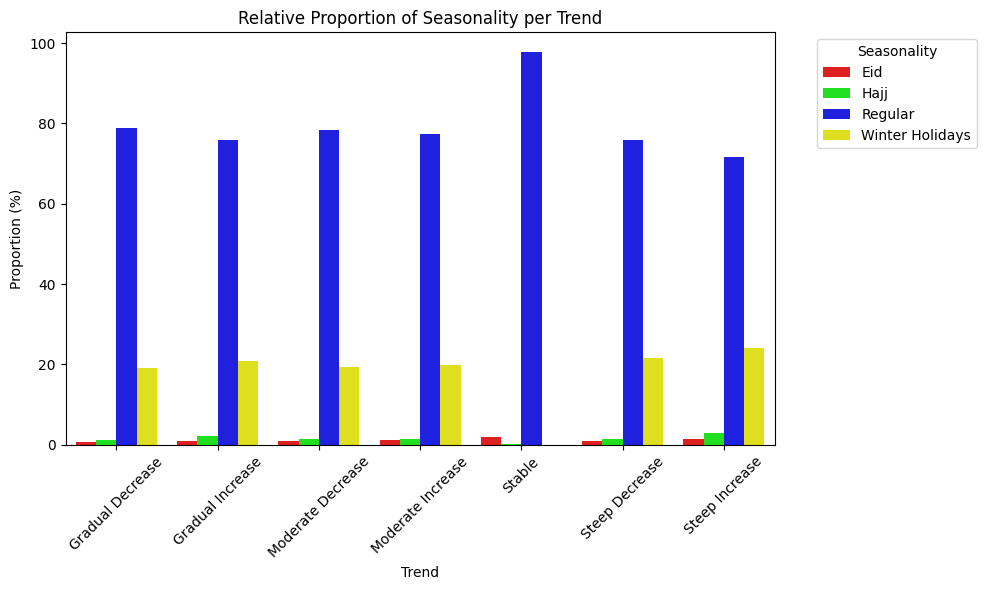

In [14]:
# Hitung frekuensi kombinasi
count_df = df.groupby(["Trend", "Seasonality"]).size().reset_index(name="Count")
# Calculate relative proportions per Seasonality
count_df["Proportion"] = (
    count_df["Count"] / count_df.groupby("Trend")["Count"].transform("sum") * 100
)
# Plot relative proportions
plt.figure(figsize=(10, 6))
sns.barplot(
    data=count_df,
    x="Trend",
    y="Proportion",
    hue="Seasonality",
    palette=["#FF0000", "#00FF00", "#0000FF", "#FFFF00", "#FF00FF", "#00FFFF"],
    dodge=True
)
plt.xticks(rotation=45)
plt.title("Relative Proportion of Seasonality per Trend")
plt.ylabel("Proportion (%)")
plt.legend(title="Seasonality", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 800x400 with 0 Axes>

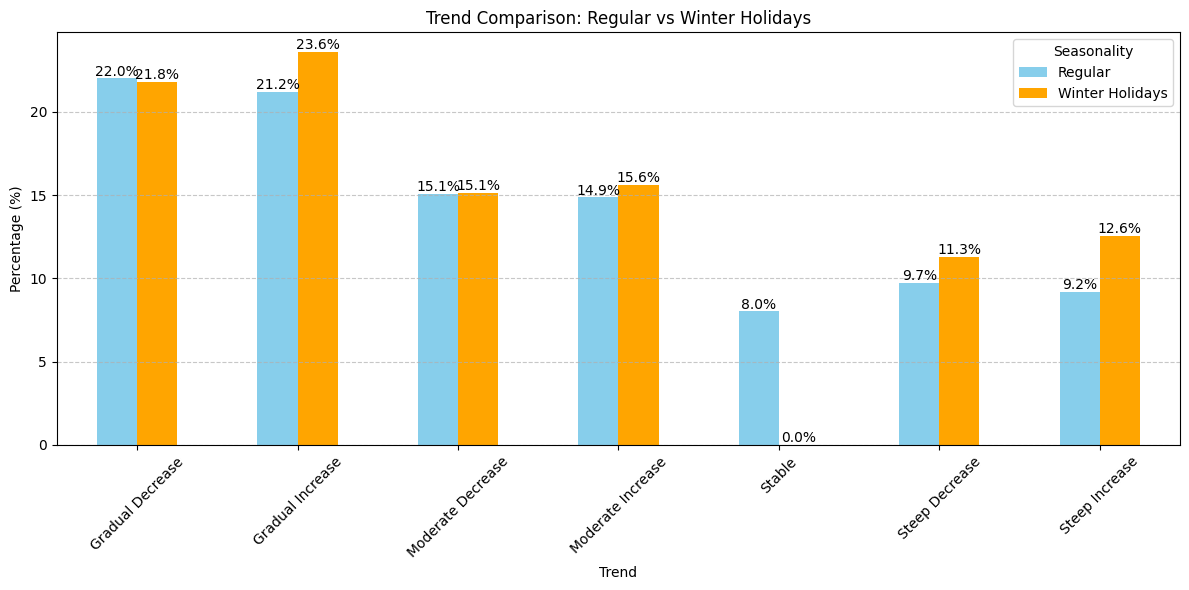

In [15]:
# Filter data only for Regular and Winter Holidays
filtered_df = df[df['Seasonality'].isin(['Regular', 'Winter Holidays'])]
# Calculate the trend percentage for each seasonality
trend_seasonality = pd.crosstab(filtered_df['Seasonality'], filtered_df['Trend'], normalize='index') * 100
# grouped bar chart
plt.figure(figsize=(8, 4))
trend_seasonality.T.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'orange'])
plt.title('Trend Comparison: Regular vs Winter Holidays')
plt.ylabel('Percentage (%)')
plt.xlabel('Trend')
plt.legend(title='Seasonality')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan label nilai
for p in plt.gca().patches:
    plt.gca().annotate(f"{p.get_height():.1f}%", 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='center', 
                      xytext=(0, 5), 
                      textcoords='offset points')

plt.tight_layout()
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# Extract year and month as separate columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
# Filter only Regular and Winter Holidays
filtered_df = df[df['Seasonality'].isin(['Regular', 'Winter Holidays'])]
# Calculate the average price change per month for each seasonality
avg_changes = filtered_df.groupby(['Seasonality', 'Month'])['Changes'].mean().reset_index()

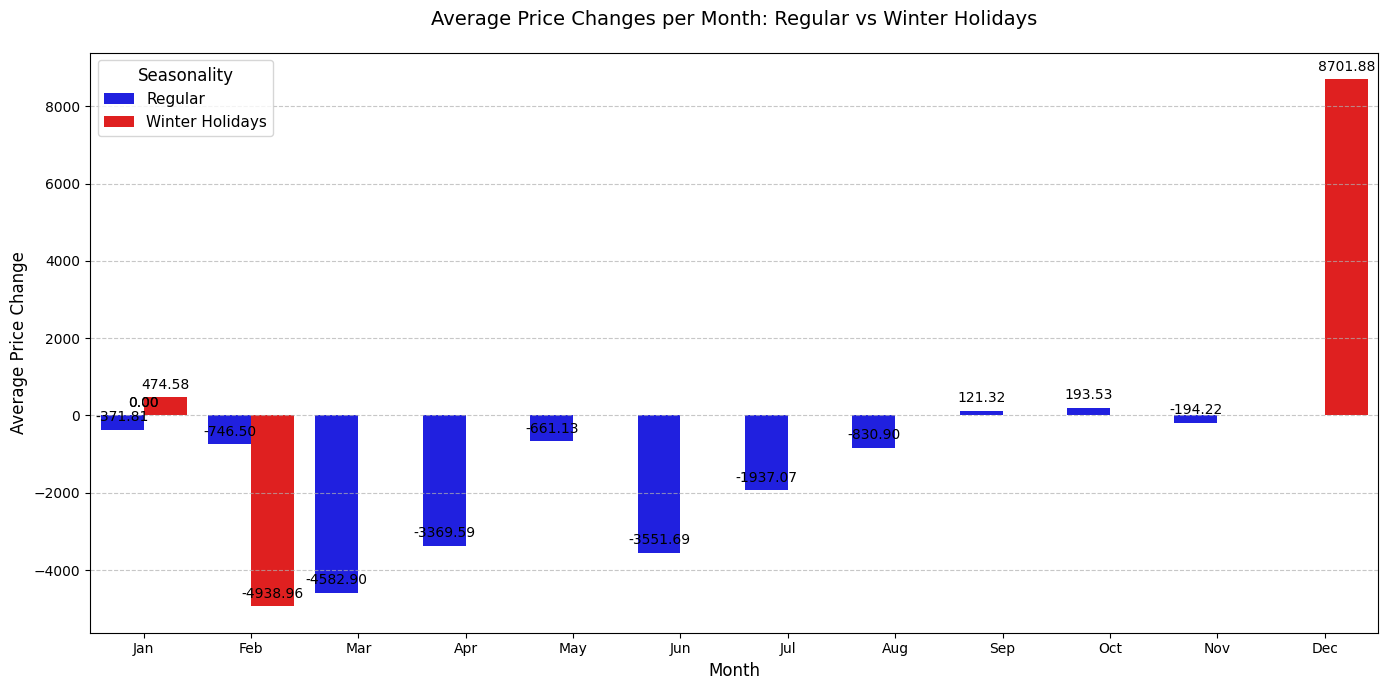

In [25]:
# Visualisasi dengan nilai di setiap bar
plt.figure(figsize=(14, 7))
ax = sns.barplot(data=avg_changes, x='Month', y='Changes', hue='Seasonality', palette=['blue', 'red'])

# Tambahkan nilai di atas setiap bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points',
                fontsize=10)

plt.title('Average Price Changes per Month: Regular vs Winter Holidays', fontsize=14, pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Price Change', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Seasonality', title_fontsize='12', fontsize='11')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 3. Days Before Departure

Do the closer the departure date, do ticket prices tend to increase or decrease?

In [ ]:
# Loading DataFrame from pickle file
with open('./datasets/data_eda(2).pkl', 'rb') as file:
    df = pickle.load(file)

In [14]:
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes,Trend,Duration Category
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000,Stable,1–3 hours
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,84352.781917,Moderate Increase,1–3 hours
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-100498.123930,Moderate Decrease,1–3 hours
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,7365.004899,Gradual Increase,1–3 hours
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,-2952.100155,Gradual Decrease,1–3 hours


In [17]:
df['Days Before Departure'].describe()

count    57000.000000
mean        45.460579
std         26.015657
min          1.000000
25%         23.000000
50%         45.000000
75%         68.000000
max         90.000000
Name: Days Before Departure, dtype: float64

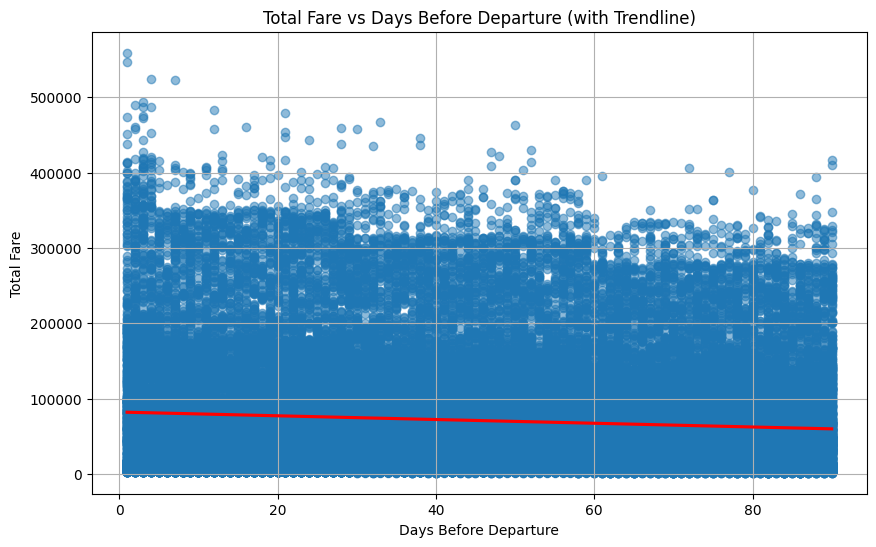

In [21]:
# Scatter plot dengan trendline
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Days Before Departure',
    y='Total Fare (BDT)',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title("Total Fare vs Days Before Departure (with Trendline)")
plt.xlabel("Days Before Departure")
plt.ylabel("Total Fare")
plt.grid(True)
plt.show()

In [ ]:
# Bagi hari ke dalam kelompok (bins)
df['Days_Bin'] = pd.cut(
    df['Days Before Departure'],
    bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
    labels=['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90']
)

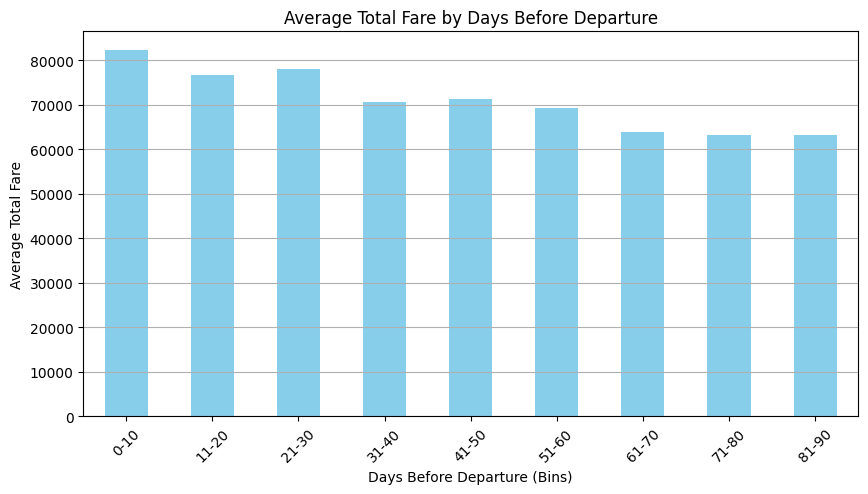

In [22]:
# Hitung rata-rata Total Fare per kelompok
fare_by_bin = df.groupby('Days_Bin')['Total Fare (BDT)'].mean()

# Plot
plt.figure(figsize=(10, 5))
fare_by_bin.plot(kind='bar', color='skyblue')
plt.title("Average Total Fare by Days Before Departure")
plt.xlabel("Days Before Departure (Bins)")
plt.ylabel("Average Total Fare")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [23]:
from scipy.stats import spearmanr

corr, p_value = spearmanr(df['Days Before Departure'], df['Total Fare (BDT)'])
print(f"Spearman's Correlation: {corr:.3f}, p-value: {p_value:.3f}")

Spearman's Correlation: -0.066, p-value: 0.000


## 4. Class

How do prices differ between classes (Economy, Business, First Class)?

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_eda(2).pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
fare_stats = df.groupby('Class')['Total Fare (BDT)'].describe()
fare_stats

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
Business,18909.0,62581.014435,55161.199863,4200.002136,8022.966608,51061.844599,108403.412271,283753.104256
Economy,19112.0,30002.073026,26635.701394,1800.975688,3944.739658,24071.439030,52083.051182,149066.656865
First Class,18979.0,120764.213167,109980.064862,8201.193549,12916.488747,94191.037108,211591.705071,558987.332444


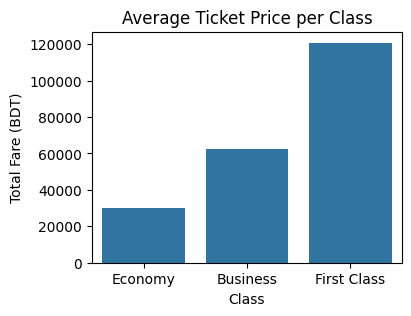

In [30]:
plt.figure(figsize=(4, 3))
sns.barplot(x='Class', y='Total Fare (BDT)', data=df, 
            order=['Economy', 'Business', 'First Class'],
            estimator='mean', errorbar=None)
plt.title('Average Ticket Price per Class')
plt.show()

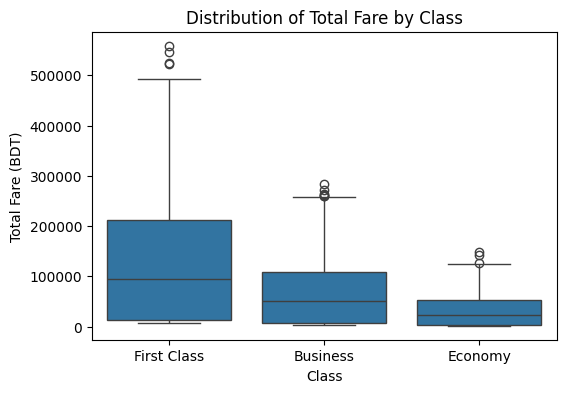

In [5]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Class', y='Total Fare (BDT)', data=df)
plt.title('Distribution of Total Fare by Class')
plt.xlabel('Class')
plt.ylabel('Total Fare (BDT)')
plt.show()

In [9]:
df['Class'].unique()

array(['First Class', 'Business', 'Economy'], dtype=object)

In [10]:
# Normality Test (Shapiro-Wilk)
print('Economy: ',stats.shapiro(df[df['Class'] == 'Economy']['Total Fare (BDT)']))
print('Business: ',stats.shapiro(df[df['Class'] == 'Business']['Total Fare (BDT)']))
print('First Class: ',stats.shapiro(df[df['Class'] == 'First Class']['Total Fare (BDT)']))

# Homogeneity Test (Levene's)
print(stats.levene(df[df['Class'] == 'Economy']['Total Fare (BDT)'], 
                   df[df['Class'] == 'Business']['Total Fare (BDT)'],
                   df[df['Class'] == 'First Class']['Total Fare (BDT)']))

Economy:  ShapiroResult(statistic=np.float64(0.881205113608479), pvalue=np.float64(1.3204352783426245e-79))
Business:  ShapiroResult(statistic=np.float64(0.8812761421064043), pvalue=np.float64(2.3404081092967302e-79))
First Class:  ShapiroResult(statistic=np.float64(0.8738048984953248), pvalue=np.float64(8.321411856267924e-81))
LeveneResult(statistic=np.float64(15525.367833991562), pvalue=np.float64(0.0))


In [13]:
# Kruskal-Wallis Test
economy = df[df['Class'] == 'Economy']['Total Fare (BDT)']
business = df[df['Class'] == 'Business']['Total Fare (BDT)']
first = df[df['Class'] == 'First Class']['Total Fare (BDT)']
stat, p_value = stats.kruskal(economy, business, first)
print("Kruskal-Wallis p-value:", p_value)

Kruskal-Wallis p-value: 0.0


In [15]:
# Combine data
data = [economy, business, first]
labels = ['Economy', 'Business', 'First Class']
# Dunn's Test with Bonferroni correction
dunn_result = sp.posthoc_dunn(data, p_adjust='bonferroni')
# Set column and row labels
dunn_result.columns = labels
dunn_result.index = labels
print(dunn_result)

             Economy  Business  First Class
Economy          1.0       0.0          0.0
Business         0.0       1.0          0.0
First Class      0.0       0.0          1.0


## 5. Aircraft Type

Does the specific type of aircraft (e.g. Boeing vs Airbus) affect the price?

In [ ]:
# Loading DataFrame from pickle file
with open('./datasets/data_eda(2).pkl', 'rb') as file:
    df = pickle.load(file)

In [27]:
df.head()

,Airline,Date,Duration (hrs),Stopovers,Aircraft Type,Class,Booking Source,Base Fare (BDT),Tax & Surcharge (BDT),Total Fare (BDT),Seasonality,Days Before Departure,YearMonth,Route,Changes,Trend,Duration Category
52232,Air Arabia,2025-03-19,2.555513,1 Stop,Boeing 737,First Class,Travel Agency,62480.399051,15372.059858,77852.458908,Regular,56,2025-03,BZL - BKK,0.000000,Stable,1–3 hours
40233,Air Arabia,2025-03-26,2.323824,Direct,Boeing 737,Business,Online Website,112322.638279,22848.395742,162205.240826,Regular,4,2025-03,BZL - BKK,84352.781917,Moderate Increase,1–3 hours
33512,Air Arabia,2025-06-15,2.381906,Direct,Boeing 737,First Class,Travel Agency,48440.971213,13266.145682,61707.116895,Regular,7,2025-06,BZL - BKK,-100498.123930,Moderate Decrease,1–3 hours
39374,Air Arabia,2025-07-25,2.469296,Direct,Boeing 737,Business,Travel Agency,44834.870866,12725.230630,69072.121794,Regular,1,2025-07,BZL - BKK,7365.004899,Gradual Increase,1–3 hours
13927,Air Arabia,2025-09-02,2.388552,Direct,Boeing 787,Economy,Online Website,52278.279687,13841.741953,66120.021639,Regular,70,2025-09,BZL - BKK,-2952.100155,Gradual Decrease,1–3 hours


In [16]:
df.columns

Index(['Airline', 'Date', 'Duration (hrs)', 'Stopovers', 'Aircraft Type',
       'Class', 'Booking Source', 'Base Fare (BDT)', 'Tax & Surcharge (BDT)',
       'Total Fare (BDT)', 'Seasonality', 'Days Before Departure', 'YearMonth',
       'Route', 'Changes', 'Trend', 'Duration Category'],
      dtype='object')

Does the specific type of aircraft (e.g. Boeing vs Airbus) affect the price?

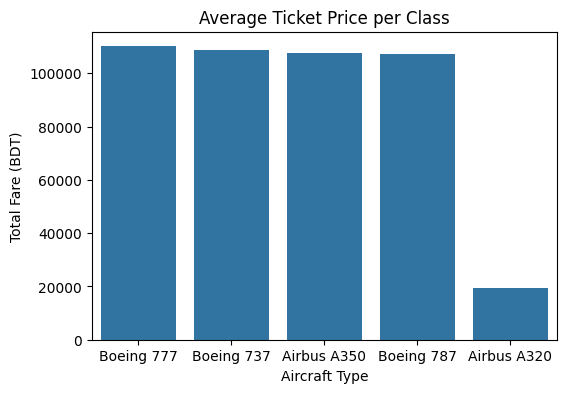

In [20]:
# Calculate the average value of 'Total Fare (BDT)' for each 'Aircraft Type'
df_mean = df.groupby('Aircraft Type')['Total Fare (BDT)'].mean().reset_index()

# Urutkan data berdasarkan nilai rata-rata 'Total Fare (BDT)' dalam urutan menurun
df_mean_sorted = df_mean.sort_values(by='Total Fare (BDT)', ascending=False)

# Bar plot
plt.figure(figsize=(6, 4))
sns.barplot(x='Aircraft Type', y='Total Fare (BDT)', data=df_mean_sorted)
plt.title('Average Ticket Price per Class')
plt.show()

In [23]:
df_mean

,Aircraft Type,Total Fare (BDT)
0,Airbus A320,19496.249660
1,Airbus A350,107655.670785
2,Boeing 737,108853.371356
3,Boeing 777,110095.372212
4,Boeing 787,107298.344683


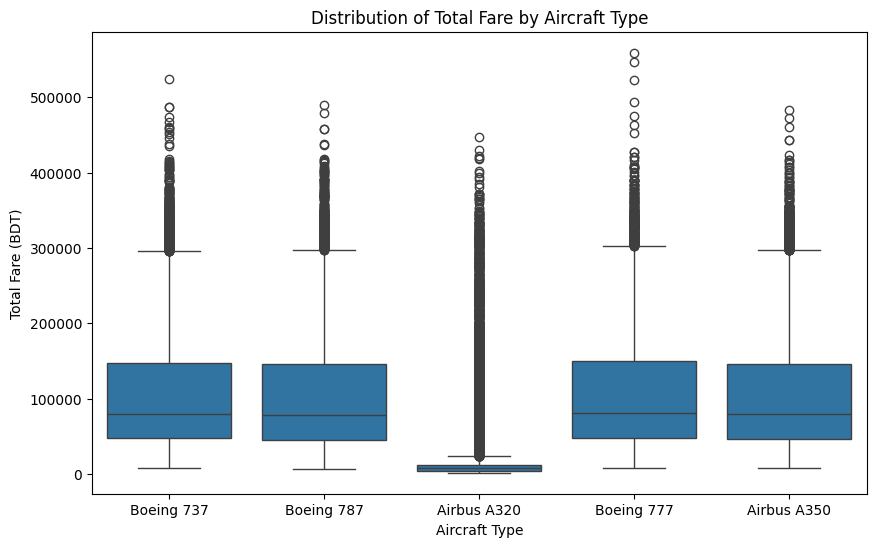

In [22]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aircraft Type', y='Total Fare (BDT)', data=df)
plt.title('Distribution of Total Fare by Aircraft Type')
plt.xlabel('Aircraft Type')
plt.ylabel('Total Fare (BDT)')
plt.show()

In [25]:
# Outlier count function with IQR
def calculate_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Calculate the percentage of outliers per aircraft type
outlier_percentage = {}
for aircraft in df['Aircraft Type'].unique():
    subset = df[df['Aircraft Type'] == aircraft]
    outliers = calculate_outliers(subset['Total Fare (BDT)'])
    percentage = (len(outliers) / len(subset)) * 100
    outlier_percentage[aircraft] = round(percentage, 2)

In [26]:
# Hasil
print("Percentage of Outliers per Aircraft Type:")
for aircraft, percentage in outlier_percentage.items():
    print(f"- {aircraft}: {percentage}%")

Percentage of Outliers per Aircraft Type:
- Boeing 737: 4.37%
- Boeing 787: 3.74%
- Airbus A320: 11.11%
- Boeing 777: 3.83%
- Airbus A350: 4.11%


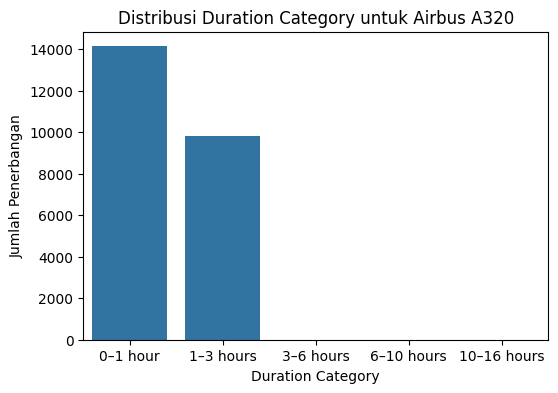

In [ ]:
# Visualisasi distribusi duration category
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Aircraft Type'] == 'Airbus A320'], x='Class', order=['0–1 hour', '1–3 hours', '3–6 hours', '6–10 hours', '10–16 hours'])
plt.title('Distribusi Duration Category untuk Airbus A320')
plt.xlabel('Duration Category')
plt.ylabel('Jumlah Penerbangan')
plt.show()

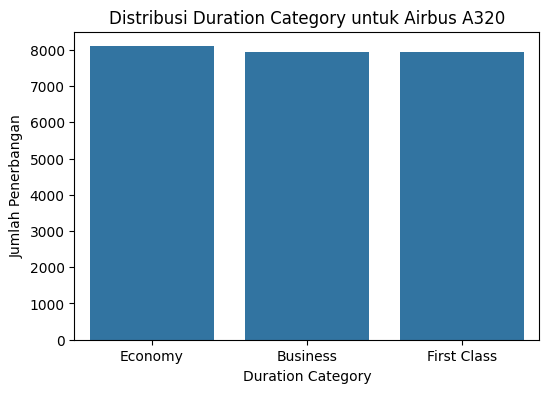

In [34]:
# Visualisasi distribusi duration category
plt.figure(figsize=(6, 4))
sns.countplot(data=df[df['Aircraft Type'] == 'Airbus A320'], x='Class', order=['Economy','Business','First Class'])
plt.title('Distribusi Duration Category untuk Airbus A320')
plt.xlabel('Duration Category')
plt.ylabel('Jumlah Penerbangan')
plt.show()